##**Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np

import requests
from io import StringIO
from bs4 import BeautifulSoup

## Data (df) - GitHub

In [2]:
# data base's URL - Kaggle
url = 'https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv'

response = requests.get(url)
data = response.text

# Creating a DataFrame with the data base
df = pd.read_csv(StringIO(data), header = 0)
df.head()

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [3]:
df.columns

Index(['Country', 'Continent', 'Year', 'Status', 'Life_expectancy ',
       'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles ', ' BMI ', 'under_five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [4]:
df.dtypes

Country                             object
Continent                           object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                      int64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
 BMI                               float64
under_five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                          object
 HIV/AIDS                          float64
GDP                                float64
Population                          object
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: obje

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Country                              0
Continent                            0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
 BMI                                 0
under_five_deaths                    0
Polio                                8
Total_expenditure                  152
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income_composition_of_resources      3
Schooling                            3
dtype: int64

In [7]:
df.fillna(df.mean().round(2), inplace=True)
df

<ipython-input-7-944cd0b29284>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean().round(2), inplace=True)


,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,Zimbabwe,Africa,2004,Developing,44.3,723,27,4.36,0.000000,68.0,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,Zimbabwe,Africa,2003,Developing,44.5,715,26,4.06,0.000000,7.0,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,Zimbabwe,Africa,2002,Developing,44.8,73,25,4.43,0.000000,73.0,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,Zimbabwe,Africa,2001,Developing,45.3,686,25,1.72,0.000000,76.0,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


## Data (data) - Worldometers

In [8]:
url = 'https://www.worldometers.info/world-population/population-by-country/'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the population data
table = soup.find('table', {'id': 'example2'})

# Convert the table to a pandas dataframe
data = pd.read_html(str(table))[0]

# Convert the 'Population' column to string
data[data.columns[2]] = data[data.columns[2]].astype(str)

# Convert the 'Population' column to numeric
data[data.columns[2]] = pd.to_numeric(data[data.columns[2]].str.replace(',', ''), errors='coerce')

data

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,2,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,3,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,4,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,5,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4386,-0.09 %,-4,44,100,0,1.6,44.0,11 %,0.00 %
230,231,Falkland Islands,3791,0.29 %,11,0,12170,0,1.6,40.0,62 %,0.00 %
231,232,Niue,1935,0.05 %,1,7,260,0,2.4,36.0,41 %,0.00 %
232,233,Tokelau,1893,1.18 %,22,189,10,0,2.6,27.0,0 %,0.00 %


In [9]:
data.drop('#', inplace = True, axis = 1)

In [10]:
data.columns

Index(['Country (or dependency)', 'Population  (2023)', 'Yearly  Change',
       'Net  Change', 'Density  (P/Km²)', 'Land Area  (Km²)',
       'Migrants  (net)', 'Fert.  Rate', 'Med.  Age', 'Urban  Pop %',
       'World  Share'],
      dtype='object')

In [11]:
data.dtypes

Country (or dependency)     object
Population  (2023)           int64
Yearly  Change              object
Net  Change                  int64
Density  (P/Km²)             int64
Land Area  (Km²)             int64
Migrants  (net)              int64
Fert.  Rate                float64
Med.  Age                  float64
Urban  Pop %                object
World  Share                object
dtype: object

In [12]:
data.duplicated().sum()

0

In [13]:
data.isnull().sum()

Country (or dependency)    0
Population  (2023)         0
Yearly  Change             0
Net  Change                0
Density  (P/Km²)           0
Land Area  (Km²)           0
Migrants  (net)            0
Fert.  Rate                1
Med.  Age                  1
Urban  Pop %               0
World  Share               0
dtype: int64

## Question 1

Text(0, 0.5, 'f(x)')

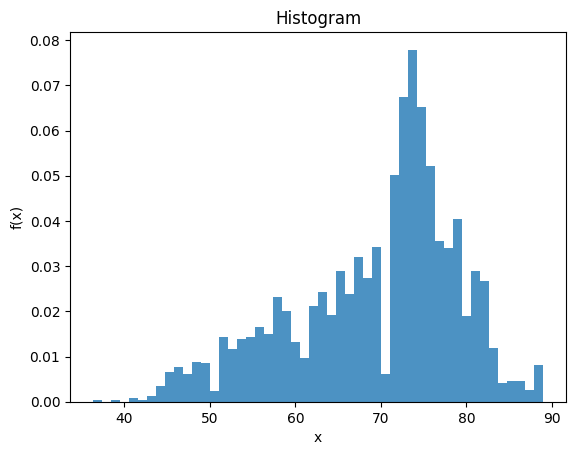

In [14]:
plt.hist(df['Life_expectancy '], density = True, bins = 50, alpha = 0.8) # alpha: opacity/transparency

plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

In [15]:
print( 'Mean:', df['Life_expectancy '].mean().round(1) )
# np.mean(df['Life_expectancy '].round(1))

Mean: 69.5


In [16]:
print( 'Variance:', df['Life_expectancy '].var().round(1) )
# np.var(df['Life_expectancy '].round(1))

Variance: 92.9


## Question 2

In [17]:
# Creating a dataset with the selected countries
countries = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
df2 = df[df['Country'].isin(countries)]

# Convert the 'Year' column to datetime type
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')
df2

<ipython-input-17-8f2970ba15d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')


,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
48,Angola,Africa,2015-01-01,Developing,52.4,335,66,0.00,0.000000,64.00,...,7.0,5.87,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
49,Angola,Africa,2014-01-01,Developing,51.7,348,67,8.33,23.965612,64.00,...,68.0,3.31,64,2.0,479.312240,2692466,8.5,8.3,0.527,11.4
50,Angola,Africa,2013-01-01,Developing,51.1,355,69,8.10,35.958573,77.00,...,67.0,4.26,77,2.3,484.616884,2599834,8.6,8.5,0.523,11.4
51,Angola,Africa,2012-01-01,Developing,56.0,358,72,8.24,256.122524,75.00,...,75.0,3.30,75,2.6,4598.249988,259615,8.8,8.6,0.508,10.3
52,Angola,Africa,2011-01-01,Developing,51.0,361,75,8.06,239.891392,72.00,...,73.0,3.38,71,2.5,4299.128890,24218565,8.9,8.8,0.495,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zambia,Africa,2004-01-01,Developing,47.9,578,36,2.46,8.369852,80.85,...,84.0,7.33,83,17.6,53.277222,11731746,7.2,7.1,0.456,10.5
2441,Zambia,Africa,2003-01-01,Developing,46.4,64,39,2.33,65.789974,80.85,...,85.0,8.18,83,18.2,429.158343,11421984,7.3,7.2,0.443,10.2
2442,Zambia,Africa,2002-01-01,Developing,45.5,69,41,2.44,54.043480,80.85,...,85.0,6.93,84,18.4,377.135244,111249,7.4,7.3,0.433,10.0
2443,Zambia,Africa,2001-01-01,Developing,44.6,611,43,2.61,46.830275,80.85,...,86.0,6.56,85,18.6,378.273624,1824125,7.4,7.4,0.424,9.8


In [18]:
# Setting the Year column as the index
df2.set_index('Year', inplace=True)
df2

,Country,Continent,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
Year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Angola,Africa,Developing,52.4,335,66,0.00,0.000000,64.00,118,...,7.0,5.87,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
2014-01-01,Angola,Africa,Developing,51.7,348,67,8.33,23.965612,64.00,11699,...,68.0,3.31,64,2.0,479.312240,2692466,8.5,8.3,0.527,11.4
2013-01-01,Angola,Africa,Developing,51.1,355,69,8.10,35.958573,77.00,8523,...,67.0,4.26,77,2.3,484.616884,2599834,8.6,8.5,0.523,11.4
2012-01-01,Angola,Africa,Developing,56.0,358,72,8.24,256.122524,75.00,4458,...,75.0,3.30,75,2.6,4598.249988,259615,8.8,8.6,0.508,10.3
2011-01-01,Angola,Africa,Developing,51.0,361,75,8.06,239.891392,72.00,1449,...,73.0,3.38,71,2.5,4299.128890,24218565,8.9,8.8,0.495,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-01-01,Zambia,Africa,Developing,47.9,578,36,2.46,8.369852,80.85,35,...,84.0,7.33,83,17.6,53.277222,11731746,7.2,7.1,0.456,10.5
2003-01-01,Zambia,Africa,Developing,46.4,64,39,2.33,65.789974,80.85,881,...,85.0,8.18,83,18.2,429.158343,11421984,7.3,7.2,0.443,10.2
2002-01-01,Zambia,Africa,Developing,45.5,69,41,2.44,54.043480,80.85,25036,...,85.0,6.93,84,18.4,377.135244,111249,7.4,7.3,0.433,10.0


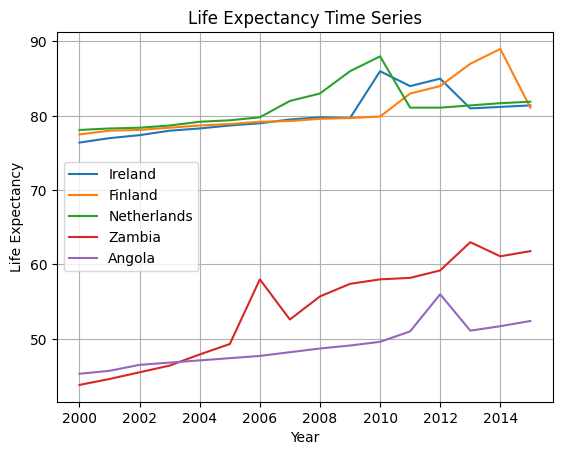

In [19]:
# Plot a time series for each country's life expectancy
for i in countries:
    plt.plot(df2.loc[df2['Country'] == i, 'Life_expectancy '], label = i)

plt.title('Life Expectancy Time Series')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
# plt.figure(figsize=(10, 6))

plt.show()

## Question 3

<ipython-input-20-9981f52c12fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


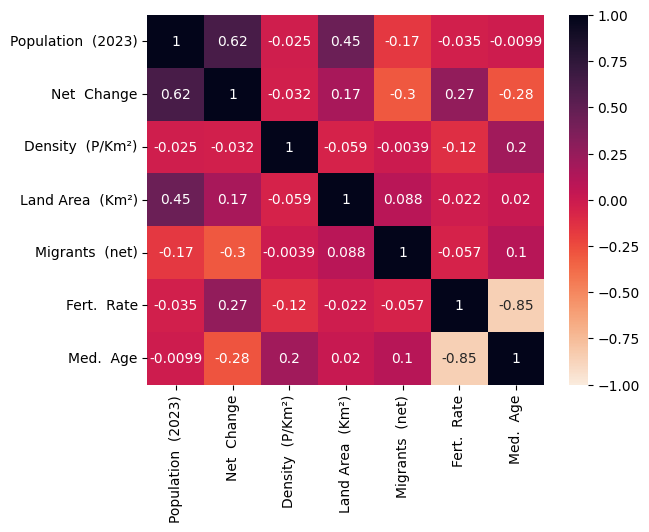

In [20]:
corr = data.corr()
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'rocket_r')

rcParams['figure.figsize'] = 8,8

plt.show()

In [21]:
corr

,Population (2023),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
Population (2023),1.000000,0.621103,-0.025359,0.451759,-0.169378,-0.035498,-0.009930
Net Change,0.621103,1.000000,-0.032072,0.170999,-0.301581,0.268418,-0.284370
Density (P/Km²),-0.025359,-0.032072,1.000000,-0.059129,-0.003888,-0.119682,0.200981
Land Area (Km²),0.451759,0.170999,-0.059129,1.000000,0.087914,-0.021915,0.020464
Migrants (net),-0.169378,-0.301581,-0.003888,0.087914,1.000000,-0.057052,0.099523
Fert. Rate,-0.035498,0.268418,-0.119682,-0.021915,-0.057052,1.000000,-0.853667
Med. Age,-0.009930,-0.284370,0.200981,0.020464,0.099523,-0.853667,1.000000


## Question 4

In [22]:
tab = pd.crosstab(df['Status'], 'count')
# tab = pd.crosstab(index = df['Status'], columns = 'count')
tab

col_0,count
Status,
Developed,448
Developing,2013


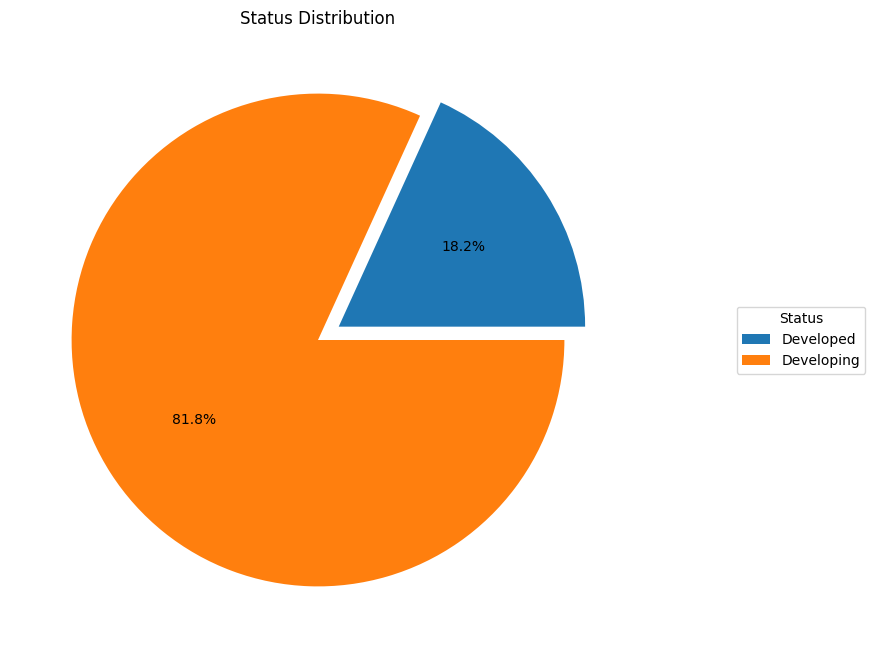

In [23]:
explode = (0.1, 0) # (developed, developing)

tab.plot.pie(y = 'count', explode = explode, labels = None, autopct='%1.1f%%', shadow = False, startangle = 0)
plt.title('Status Distribution')
plt.xlabel('')
plt.ylabel('')
plt.legend(labels = tab.index, title = 'Status', loc = 'center right', bbox_to_anchor = (1, 0, 0.4, 1))
#plt.legend().remove()
plt.show()

## Question 5

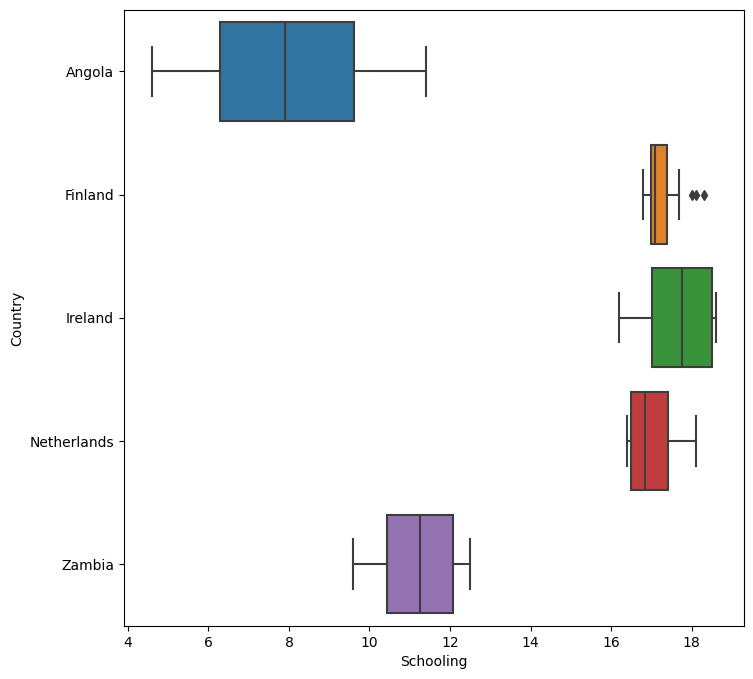

In [24]:
sns.boxplot(x = 'Schooling', y = 'Country', data = df2)

#plt.figure(figsize = (8, 8))
# plt.xlabel('', fontsize = 18)
# plt.ylabel('', fontsize = 16)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)

plt.show()